In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.optimize import fsolve
import math
from sympy import Symbol, nsolve
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from numpy.random import rand

In [29]:
#different choices of coupling

#array topology
def A_array(N):
    A=np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            if (i+1)==j or (j+1)==i:
                A[i][j]=1
    return A

#circle topology
def A_circle(N):
    A=np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            if (i+1)%N==j or (j+1)%N==i:
                A[i][j]=1
    return A

#all-to-all topology
def A_full(N):
    A=np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            if i!=j:
                A[i][j]=1
    return A

#directed ring topology
def A_dir(N):
    A=np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            if i==(j-1)%N:
                A[i][j]=1
    return A

In [39]:

start=time.time()
print()

#par=(N,tf,t_inte,c,b,d)

par=[5,200,100000,0.01,0.2,0.01]

def run_function(par):
    #Define
    N=par[0]
    I=np.zeros(N)

    tf=par[1] #final time
    t_inte=par[2] #number of steps

    c=par[3] #c parameter

    b=par[4] #b parameter

    d=par[5] #coupling

    A=A_full(N)

    #Build Laplacian
    L=np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            if i==j:
                L[i][j]=sum(A[i][j] for j in range (N))
            else:
                L[i][j]=-A[i][j]

    # Define derivative function
    def f_der(t, z, b, c, d):
        dzdt=np.zeros(2*N)
        for i in range (N):
            dzdt[i] = 1-z[i]*(1+b-c*z[i]*z[i+N])

        for i in range (N):
            sum_coupling=0
            for j in range (N):
                sum_coupling+=L[i][j]*z[j+N]
            dzdt[i+N] = z[i]*(b-c*z[i]*z[i+N])-d*sum_coupling
        return dzdt


    # Define time spans and initial values

    tspan = np.linspace(0, tf, t_inte)

    zinit=[1.53705918, 1.07878207, 0.47513891, 1.79234345, 0.93449475, 0.25445716,
     1.92848769, 1.07660849, 1.41892467, 0.46545651]#fix initial conditions

    # Solve equations numerically
    sol = solve_ivp(lambda t, z: f_der(t, z, b, c, d), [tspan[0], tspan[-1]], zinit, t_eval=tspan, rtol = 1e-5)
    return sol
par=[5,200,100000,0.01,0.2,0.01]
solucao=run_function(par)

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)



O tempo usado na solução foi: 
0.0270388126373291


In [31]:
#Data is stored in sol.y[i], time steps are stored in sol.t


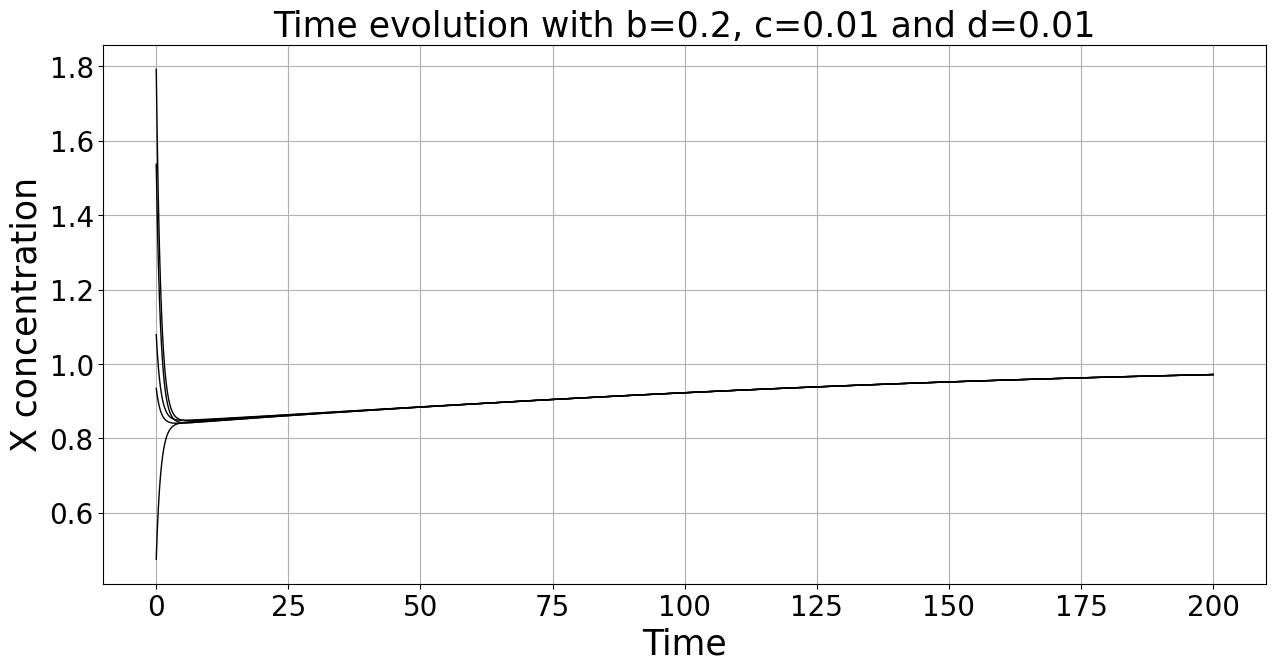


Time (in seconds) used in the numerical solution was 
0.11548638343811035


In [41]:
start=time.time()
print()
#plot data


fig,ax=plt.subplots(figsize=(15,7))

for n in range(0,N):
    plt.xlabel('Time',color='black',fontsize=25)
    plt.ylabel('X concentration',color='black',fontsize=25)
    plt.plot(solucao.t, solucao.y[n], color='black', linewidth=1, label=r'P1(t)')

plt.title('Time evolution with b='+str(b)+', c='+str(c)+' and d='+str(d),fontsize=25)
plt.grid()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

end=time.time()
print()
print("Time (in seconds) used in the numerical solution was ")
print(end-start)

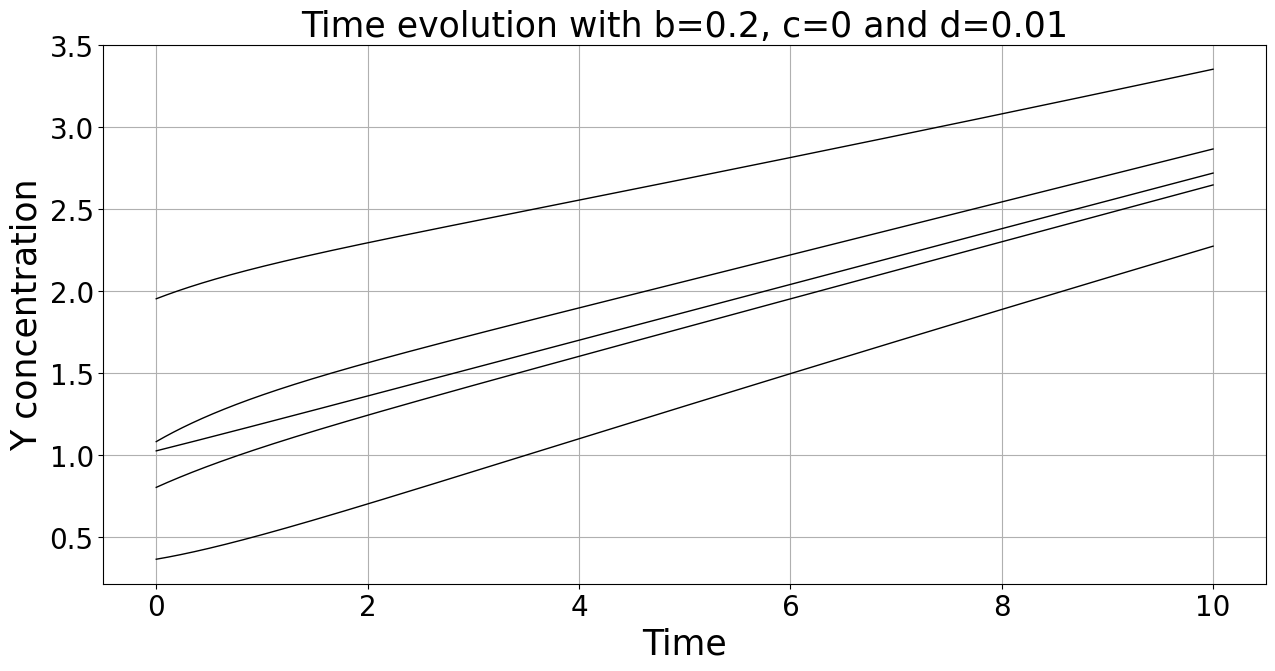


Time (in seconds) used in the numerical solution was 
0.11277127265930176


In [15]:
start=time.time()
print()
#plot data

fig,ax=plt.subplots(figsize=(15,7))
#FP=[f for i in range (len(sol.t))]

for n in range(N,2*N):
    #plt.xlim(40000,40100)
    plt.xlabel('Time',color='black',fontsize=25)
    plt.ylabel('Y concentration',color='black',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')
    #plt.plot(sol.t, FP, color='blue', linewidth=1, label=r'Fixed Point')
# plt.xlim(200,225)
# plt.ylim(1.9,2.1)
plt.title('Time evolution with b='+str(b)+', c='+str(c)+' and d='+str(d),fontsize=25)
plt.grid()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

end=time.time()
print()
print("Time (in seconds) used in the numerical solution was ")
print(end-start)